In [1]:
import numpy as np
import glob
import struct
import time
from net import LeNet5
from tools import normalization
import matplotlib.pyplot as plt
import cv2
import os

In [28]:
test_df=list()
f = open('../test.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    test_df.append(x)
f.close

testdata = np.zeros(shape=(1,3,64,64),dtype=int)
testdata_y = []
for i in range(len(test_df)):
    p1_1 = cv2.imread("../"+test_df[i][0])
    p1_2 = cv2.resize(p1_1, (64, 64))
    p1_2 = np.swapaxes(p1_2,0,2)
    p1_2 = np.swapaxes(p1_2,1,2)
    testdata = np.append(testdata,[p1_2], axis=0)
    testdata_y.append(int(test_df[i][1]))
testdata = testdata[1:]

print(testdata.shape)

testdata_y = np.array(testdata_y)
print(len(testdata_y))

(450, 3, 64, 64)
450


In [37]:
train_df=list()
f = open('../train.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    train_df.append(x)
f.close

traindata = np.zeros(shape=(1,3,64,64),dtype=int)
traindata_y = []
for i in range(len(train_df)):
    p1_1 = cv2.imread("../"+train_df[i][0])
    p1_2 = cv2.resize(p1_1, (64, 64))
    p1_2 = np.swapaxes(p1_2,0,2)
    p1_2 = np.swapaxes(p1_2,1,2)
    traindata = np.append(traindata,[p1_2], axis=0)
    traindata_y.append(int(train_df[i][1]))
    if i %1000 ==0:
        print("finish:",i)
traindata = traindata[1:]

print(traindata.shape)

traindata_y = np.array(traindata_y)
print(len(traindata_y))

finish: 0
finish: 1000
finish: 2000
finish: 3000
finish: 4000
finish: 5000
finish: 6000
finish: 7000
finish: 8000
finish: 9000
finish: 10000
finish: 11000
finish: 12000
finish: 13000
finish: 14000


MemoryError: Unable to allocate 682. MiB for an array with shape (14544, 3, 64, 64) and data type int32

In [30]:
traindata = testdata
traindata_y = testdata_y

In [33]:
batch_size = 50  # 训练时的batch size
test_batch = 45  # 测试时的batch size
epoch = 10
learning_rate = 1e-3

ax = []  # 保存训练过程中x轴的数据（训练次数）用于画图
ay_loss = []  # 保存训练过程中y轴的数据（loss）用于画图
ay_acc = []
testx = [] # 保存测试过程中x轴的数据（训练次数）用于画图
testy_acc = []  # 保存测试过程中y轴的数据（loss）用于画图
plt.ion()   # 打开交互模式
iterations_num = 0 # 记录训练的迭代次数

net = LeNet5.LeNet5()

2023-04-17 01:08:52    **********epoch:    1 , avg_epoch_acc:0.0178 , avg_epoch_loss:0.1310 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0000---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

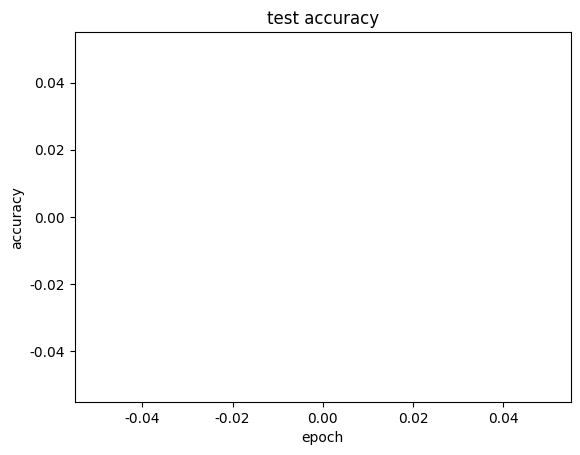

2023-04-17 01:09:08    **********epoch:    2 , avg_epoch_acc:0.0244 , avg_epoch_loss:0.0913 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0000---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


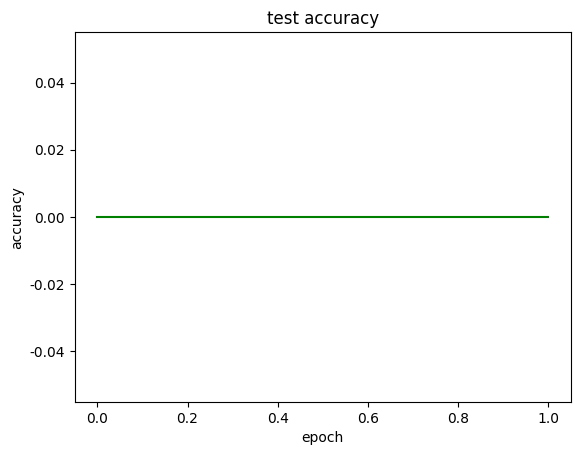

2023-04-17 01:09:24    **********epoch:    3 , avg_epoch_acc:0.0333 , avg_epoch_loss:0.0870 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0000---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


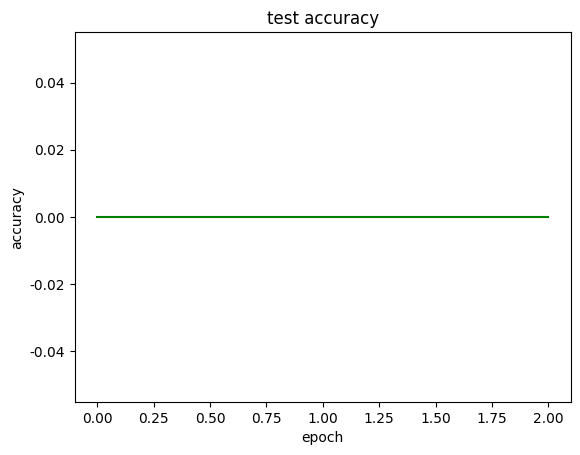

2023-04-17 01:09:39    **********epoch:    4 , avg_epoch_acc:0.0400 , avg_epoch_loss:0.0850 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0000---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

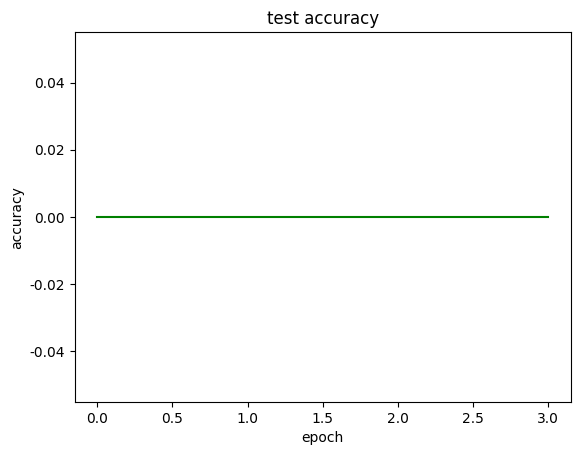

2023-04-17 01:09:54    **********epoch:    5 , avg_epoch_acc:0.0489 , avg_epoch_loss:0.0834 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0000---------------


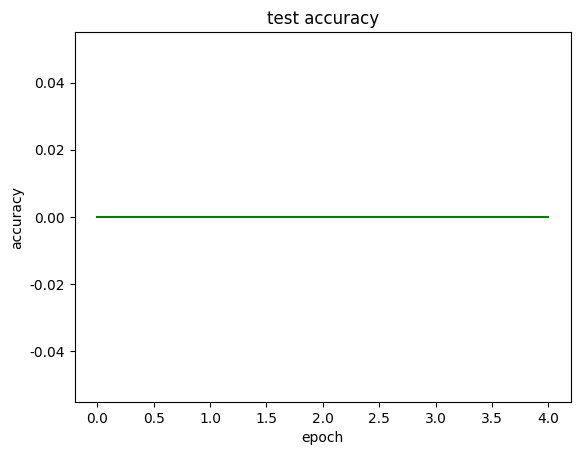

2023-04-17 01:10:10    **********epoch:    6 , avg_epoch_acc:0.0600 , avg_epoch_loss:0.0818 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0444---------------


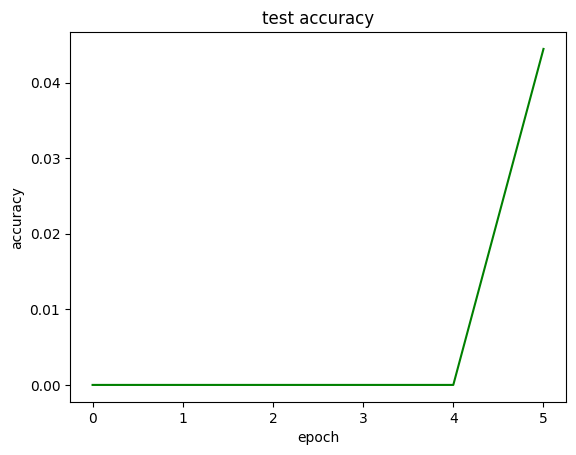

2023-04-17 01:10:26    **********epoch:    7 , avg_epoch_acc:0.0711 , avg_epoch_loss:0.0805 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0444---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

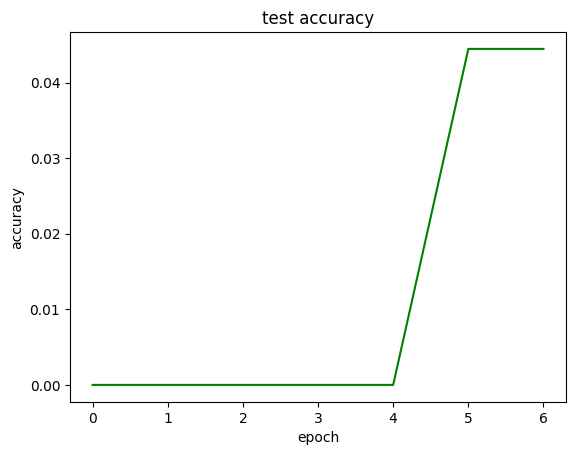

2023-04-17 01:10:41    **********epoch:    8 , avg_epoch_acc:0.0756 , avg_epoch_loss:0.0792 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0444---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

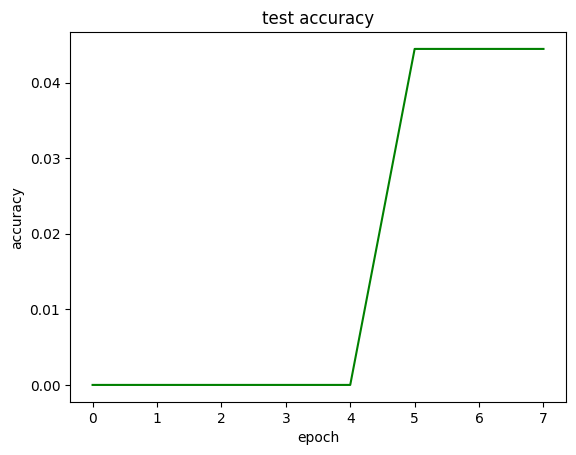

2023-04-17 01:10:56    **********epoch:    9 , avg_epoch_acc:0.0844 , avg_epoch_loss:0.0780 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0444---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

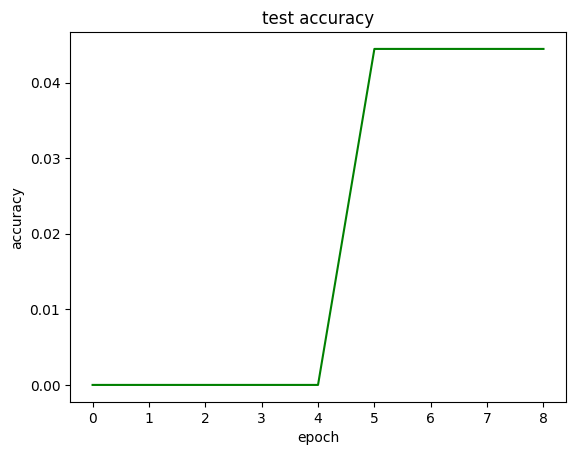

2023-04-17 01:11:11    **********epoch:   10 , avg_epoch_acc:0.0933 , avg_epoch_loss:0.0768 *************


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

------------test_set_acc:0.0444---------------


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

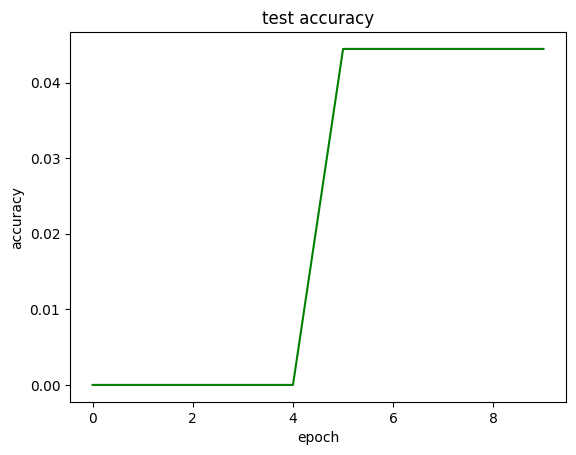

In [34]:
for E in range(epoch):
    batch_loss = 0
    batch_acc = 0

    epoch_loss = 0
    epoch_acc = 0
    #for i in range(10):
    for i in range(traindata.shape[0] // batch_size):
    
        #img = train_images[i*batch_size:(i+1)*batch_size].reshape(batch_size, 3, 28, 28)
        img = traindata[i*batch_size:(i+1)*batch_size]
        img = normalization.normalization(img)
        #label = train_labels[i*batch_size:(i+1)*batch_size]
        label = traindata_y[i*batch_size:(i+1)*batch_size]
        loss, prediction = net.forward(img, label, is_train=True)   # 训练阶段

        epoch_loss += loss
        batch_loss += loss
        for j in range(prediction.shape[0]):
            if np.argmax(prediction[j]) == label[j]:
                epoch_acc += 1
                batch_acc += 1

        net.backward(learning_rate)

        if (i+1)%50 == 0:
            print(time.strftime("%Y-%m-%d %H:%M:%S") +
                  "   epoch:%5d , batch:%5d , avg_batch_acc:%.4f , avg_batch_loss:%.4f , lr:%f "
                  % (E+1, i+1, batch_acc/(batch_size*50), batch_loss/(batch_size*50), learning_rate))
            # 绘制loss和acc变化曲线
            plt.figure(1)
            iterations_num += 1
            plt.clf()
            ax.append(iterations_num)
            ay_loss.append(batch_loss/(batch_size*50))
            ay_acc.append(batch_acc/(batch_size*50))
            plt.subplot(1, 2, 1)
            plt.title('train accuracy')  # 添加子标题
            plt.xlabel('epoch', fontsize=10)  # 添加轴标签
            plt.ylabel('accuracy', fontsize=10)
            plt.plot(ax, ay_loss, 'g-')

            plt.subplot(1, 2, 2)
            plt.title('train accuracy')  # 添加子标题
            plt.xlabel('epoch', fontsize=10)  # 添加轴标签
            plt.ylabel('accuracy', fontsize=10)
            plt.plot(ax, ay_acc, 'g-')
            plt.pause(0.4)  # 设置暂停时间，太快图表无法正常显示

            batch_loss = 0
            batch_acc = 0



    print(time.strftime("%Y-%m-%d %H:%M:%S") +
          "    **********epoch:%5d , avg_epoch_acc:%.4f , avg_epoch_loss:%.4f *************"
          % (E+1, epoch_acc/traindata.shape[0], epoch_loss/traindata.shape[0]))
    # 在test set上进行测试
    test_acc = 0
    for k in range(testdata.shape[0] // test_batch):
        img = testdata[i*batch_size:(i+1)*batch_size]
        img = normalization.normalization(img)
        label = testdata_y[i*batch_size:(i+1)*batch_size]
        _, prediction = net.forward(img, label, is_train=False)   # 测试阶段

        for j in range(prediction.shape[0]):
            if np.argmax(prediction[j]) == label[j]:
                test_acc += 1

    print("------------test_set_acc:%.4f---------------" % (test_acc / testdata.shape[0]))
    plt.figure(2)
    plt.clf()
    testx.append(E)
    testy_acc.append(test_acc / testdata.shape[0])
    plt.subplot()
    plt.title('test accuracy')  # 添加子标题
    plt.xlabel('epoch', fontsize=10)  # 添加轴标签
    plt.ylabel('accuracy', fontsize=10)
    plt.plot(testx, testy_acc, 'g-')
    plt.pause(0.4)  # 设置暂停时间，太快图表无法正常显示


plt.ioff()       # 关闭画图的窗口，即关闭交互模式
plt.show()       # 显示图片，防止闪退
